# Prediction of Fatal Heart Failure Incidents

## Part 1 - Problem Definition

This project aims to build a model to predict mortality caused by heart failure based on the following medical information:

- age
- anaemia
- creatinine_phosphokinase
- diabetes
- ejection fraction
- high blood pressure
- platelets
- serum_creatinine
- serum sodium
- sex
- smoking
- time

Data can be downloaded at Kaggle:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


Thanks to the authors of the following paper for making the dataset available on kaggle:
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). 

In [1]:
#Info on author of this notebook
__author__ = "Karin Pietruska"
__email__ = "karin.pietruska@gmail.com"

## Part 2 - Load and Clean Data

In [2]:
# import libraries 
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "data/"
filename = "heart_failure_clinical_records_dataset.csv"
df_hrdata = pd.read_csv(path + filename)

In [4]:
# display first 5 rows of data
df_hrdata.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# display size and variable types
df_hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# identify categorical features, continuous features and target variable
cat_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
con_features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
all_features = df_hrdata.columns[df_hrdata.columns != "DEATH_EVENT"].tolist()
target = "DEATH_EVENT"
print(all_features)

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [7]:
# convert the int64 data types of categorical variables to boolean
target_list=[target]
df_hrdata[cat_features + target_list] = df_hrdata[cat_features + target_list].astype(bool)
df_hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    bool   
dtypes: bool(6), float64(3), int64(4)
memory usage: 18.2 KB


In [8]:
# check for missing values
print(df_hrdata.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
# check for duplicate rows 
print(df_hrdata.duplicated().sum())

0


## Part 3 - Exploratory Data Analysis

### 3-1 Descriptive Statistics 

In [10]:
# summary statistics for continuous variables 
df_hrdata[con_features].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
# summary statistics for categorical features 
df_hrdata[cat_features].describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking
count,299,299,299,299,299
unique,2,2,2,2,2
top,False,False,False,True,False
freq,170,174,194,194,203


In [12]:
df_hrdata[target].describe()

count       299
unique        2
top       False
freq        203
Name: DEATH_EVENT, dtype: object

### 3-2 Correlations among Feature Variables

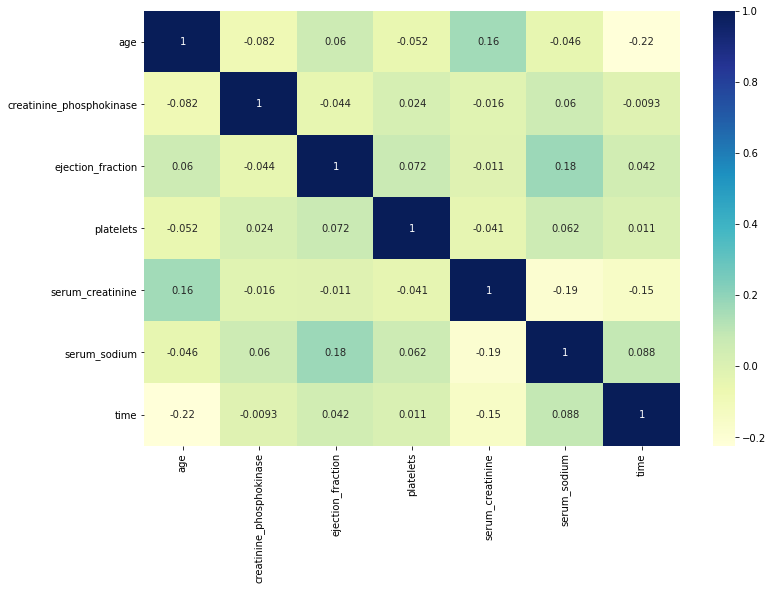

In [13]:
# assess correlations among continuous features and plot in heatmap 

corrMatrix = df_hrdata[con_features].corr()
fig, ax = plt.subplots(figsize=(12,8))  
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()



pearson correlation coefficient are all < 0.25 with the strongest correlation between age and time to death (r=-0.22). The low r values indicate that there is little redundancy in the information provided by the distinct numeric variables. 

### Associations between Individual Features and Target 

In [14]:
# method to visualize associations between each feature variable and target variable
def expl_relation(df, feature, target, vars_numeric, vars_categorical):
    "explores relations between feature variables and target variable"
    if feature in vars_numeric:
        print(feature)
        plt.figure(figsize = (14, 6))
        plt.subplot(1,2,1)
        sns.histplot(df[feature]).set_title('Histogram')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[target], y=df[feature])
        plt.show()
    elif feature in vars_categorical:
        print(feature)
        plt.figure(figsize = (14, 6))
        plt.subplot(1,2,1)
        sns.countplot(x=feature, data=df).set_title('Frequency Plot')
        plt.show()
        print("Frequency Table for ", feature)
        print(df.groupby([target, feature]).size())
       

#### Age and Death Events

age


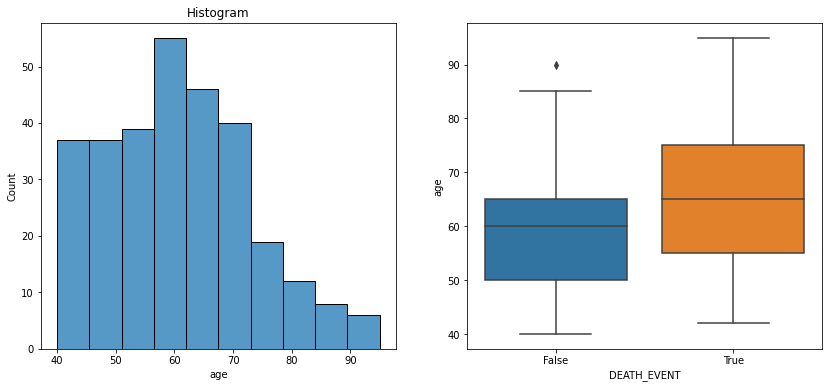

In [15]:
expl_relation(df_hrdata, all_features[0], target, con_features, cat_features)

##### Age is positively associated with fatal heart failure. Persons who died of cardiac failure were higher in age in relation to the no death event group. 

#### Anaemia and Death Events

anaemia


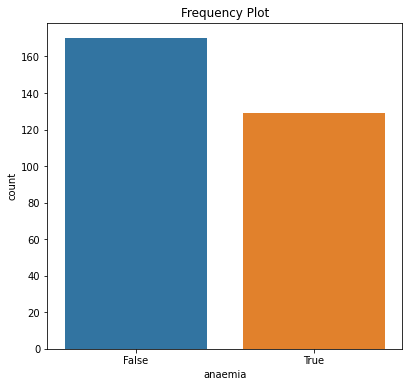

Frequency Table for  anaemia
DEATH_EVENT  anaemia
False        False      120
             True        83
True         False       50
             True        46
dtype: int64


In [16]:
expl_relation(df_hrdata, all_features[1], target, con_features, cat_features)

#### Creatinine Phosphokinase and Death Events

creatinine_phosphokinase


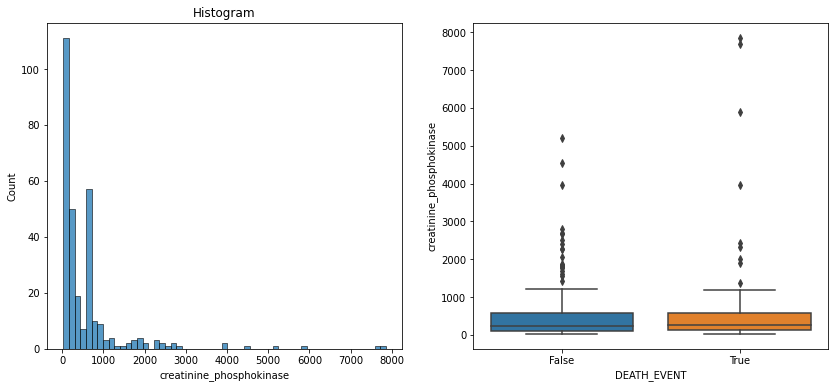

In [17]:
expl_relation(df_hrdata, all_features[2], target, con_features, cat_features)

#### Diabetes and Death Events

diabetes


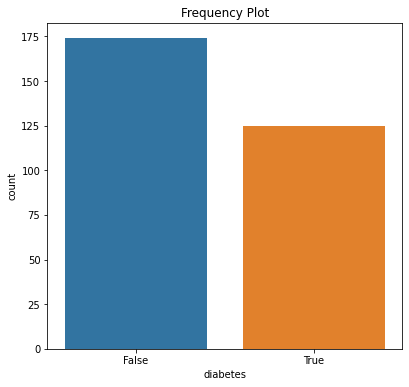

Frequency Table for  diabetes
DEATH_EVENT  diabetes
False        False       118
             True         85
True         False        56
             True         40
dtype: int64


In [18]:
expl_relation(df_hrdata, all_features[3], target, con_features, cat_features)

#### Ejection Fraction and Death Events

ejection_fraction


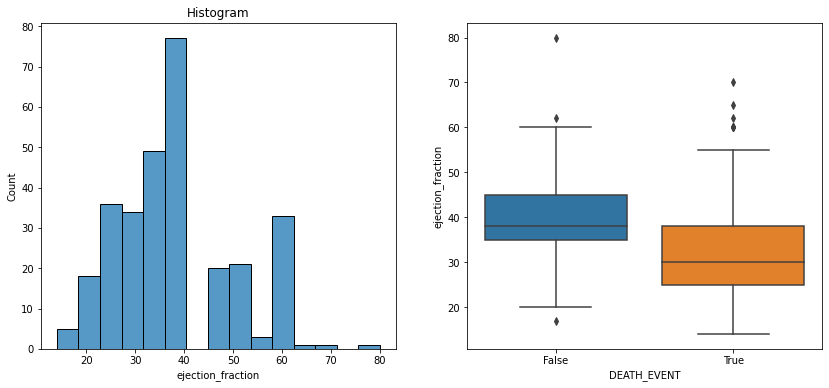

In [19]:
expl_relation(df_hrdata, all_features[4], target, con_features, cat_features)

##### The ejection fraction is lower in the group with a death event.

#### High Blood Pressure and Death Events

high_blood_pressure


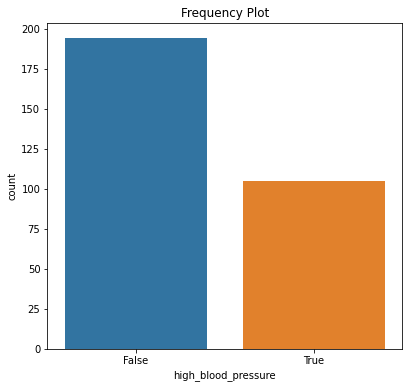

Frequency Table for  high_blood_pressure
DEATH_EVENT  high_blood_pressure
False        False                  137
             True                    66
True         False                   57
             True                    39
dtype: int64


In [20]:
expl_relation(df_hrdata, all_features[5], target, con_features, cat_features)

#### Platelets and Death Events

platelets


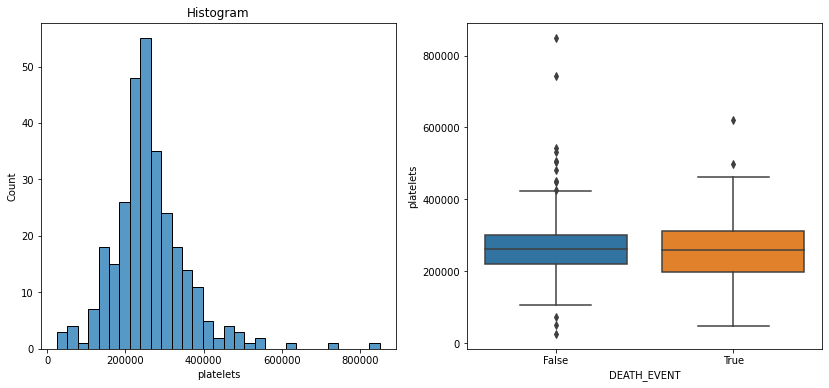

In [21]:
expl_relation(df_hrdata, all_features[6], target, con_features, cat_features)

#### Serum Creatinine and Death Events

serum_creatinine


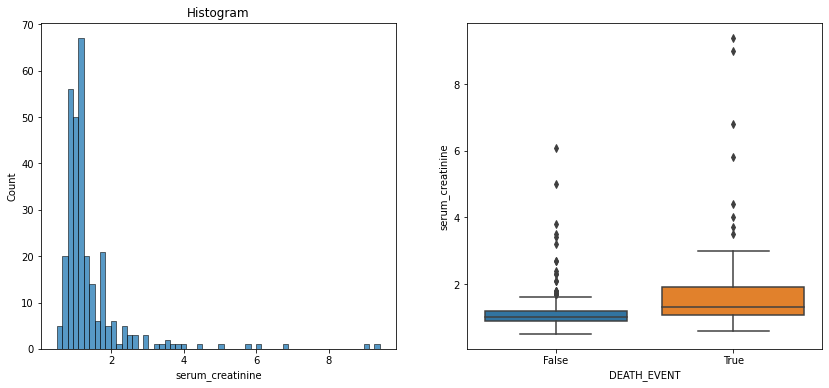

In [22]:
expl_relation(df_hrdata, all_features[7], target, con_features, cat_features)

#### Serum Sodium and Death Events

serum_sodium


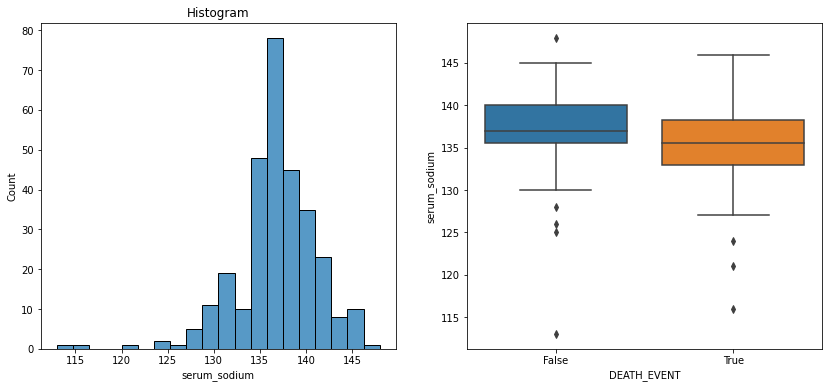

In [23]:
expl_relation(df_hrdata, all_features[8], target, con_features, cat_features)

#### Sex and Death Events

sex


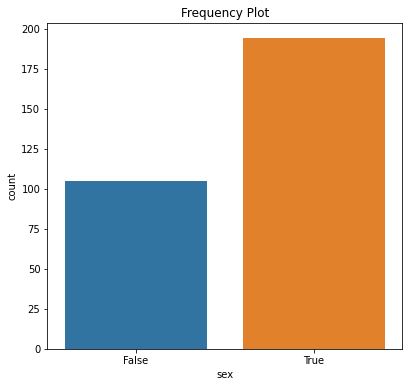

Frequency Table for  sex
DEATH_EVENT  sex  
False        False     71
             True     132
True         False     34
             True      62
dtype: int64


In [24]:
expl_relation(df_hrdata, all_features[9], target, con_features, cat_features)

#### Smoking and Death Events

smoking


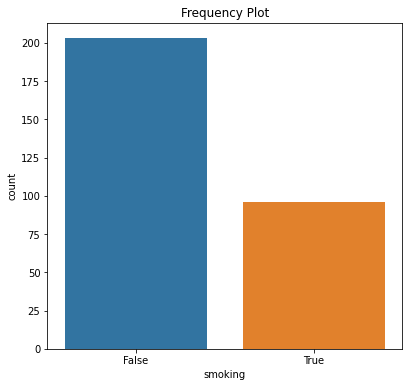

Frequency Table for  smoking
DEATH_EVENT  smoking
False        False      137
             True        66
True         False       66
             True        30
dtype: int64


In [25]:
expl_relation(df_hrdata, all_features[10], target, con_features, cat_features)

#### Time and Death Events

time


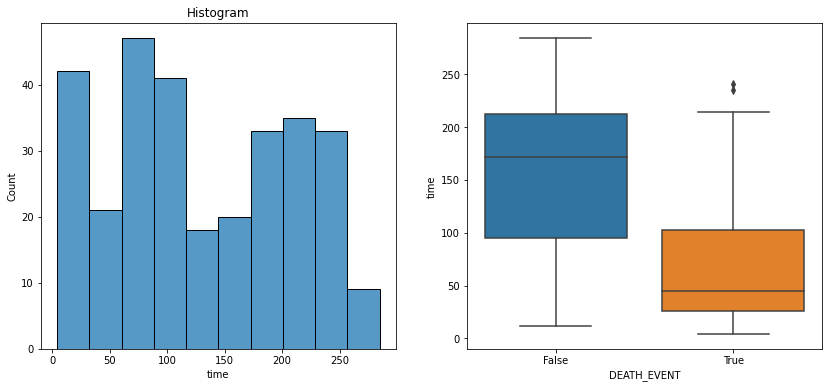

In [26]:
expl_relation(df_hrdata, all_features[11], target, con_features, cat_features)

In [27]:
all_features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

### Summary of EDA

Overall we have n= 299 samples in the dataset. With respect to the target variable "Death Event", the dataset is slightly imbalanced with more persons without a death event (n=203) in relation to persos who died because of cardiac failure. 

The correlational analysis among continuous feature variables shows that the variables do not convey much redundant information and thus display only very low to no correlation. 

Based on the EDA we expect the following feature variables to be strongest predictors for the target "Death Event":
- age
- time
- ejection fraction 
- serum creatinine

